# **WAVE FOOTPRINT FOR HISTORICAL TCs**

In [1]:
import os
import xarray as xr 
import numpy as np
from IPython.display import display, Image

from codes.graffiti import *

## Model explanation

**The model (Cagigal et al., Submitted) assumes a circular shape of the TC influence area and defines composites of significant wave height clustered as a function of minimum pressure, TC forward velocity and track latitude.** <br>
- The plot below serves as a summary of the model, in which we can observe in the left the centroid of the TC track parameters (Pressure, Speed and Latitude) for the 49 clusters and in the right the composite of significant wave height associated to each of the 49 clusters, represented by its 0.5 quantile.

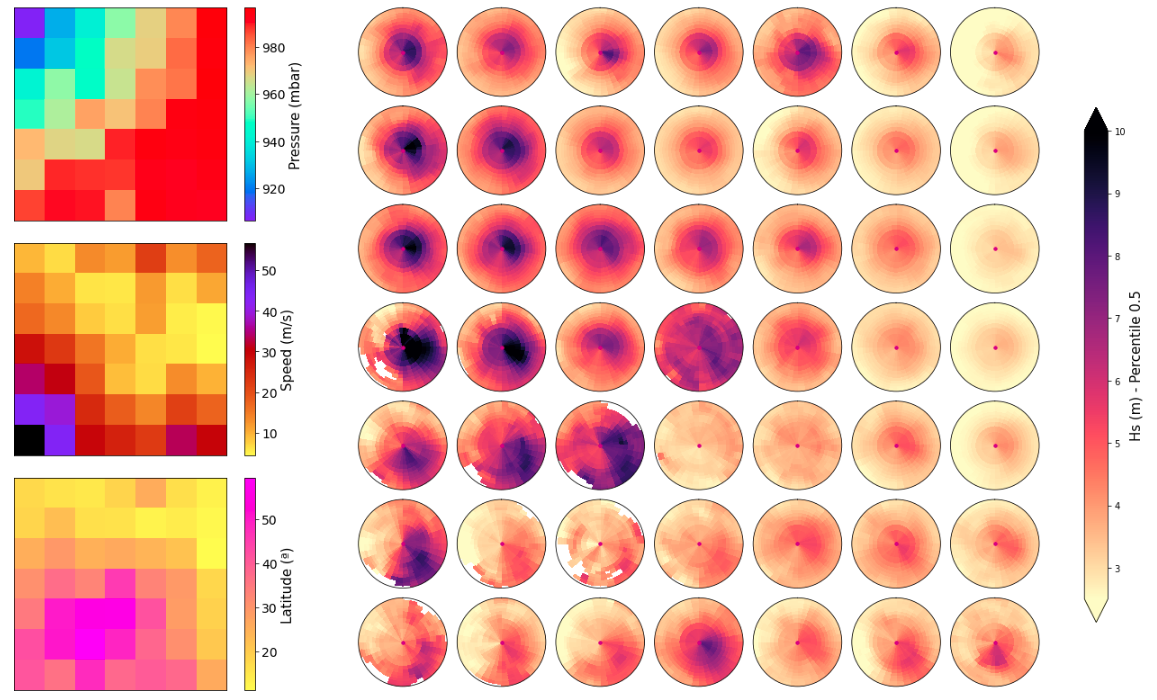

In [2]:
display(Image(filename='resources/som_mean.png'))

*Figure above from Cagigal et al., (Submitted)*


## Load needed files

To run the model, we need to load the data corresponding to the SOM clustering and also, the parameters from the GEV distribution associated to each of the 49 clusters.

In [3]:
path=r'resources/data'

TCs_h=xr.open_dataset(os.path.join(path, 'IBTrACS.ALL.v04r00_processed.nc'))

#Som fitting
n_subset=7500
som_fit=xr.open_dataset(os.path.join(path, 'SOM_fit_subset_' + str(n_subset) +'.nc' ))

#Gev parameters from classification
TCs_waves=xr.open_dataset(os.path.join(path,'TCs_waves_ALL_years_gev_params_smooth.nc')) 


## Select TC

(<Figure size 1440x720 with 2 Axes>, <GeoAxesSubplot:>)

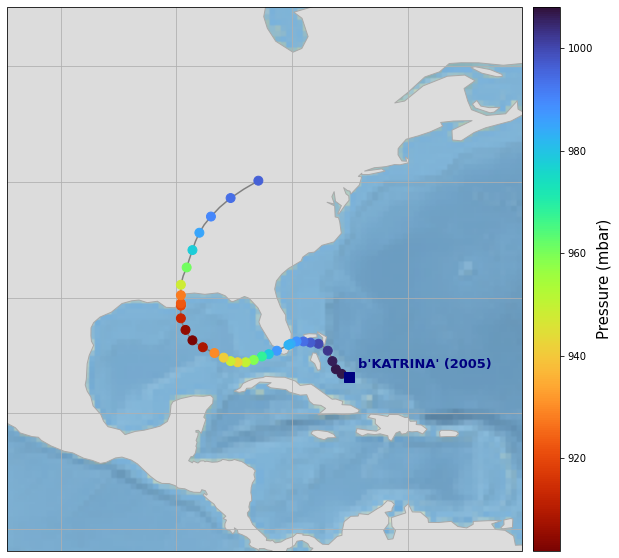

In [4]:
#Select 1 TC

t=4058 #Katrina: 4058, Irma 2017: 5157, Roy 1988: 2500, Yasi 2011: 4550
tc=TCs_h.isel(storm=t)  
Plot_track(tc, figsize=[20,10], cmap='turbo_r')


## Obtain wave fields

Each point of the track will fall within one of the 49 clusters defined with the SOM algorithm, so that the wave field in the 500km surrounding each point can be obtained as below:

In [6]:
qtile=0.525 #Percentile to plot

*Although Generate_Waves_TC only plots the results for the given qtile above, it calculates the wave fields for a range of percentiles, that can be changed below, and which default is: prctiles=np.arange(0,1.05,0.025)*

<xarray.Dataset>
Dimensions:      (angle: 37, date_time: 58, distance: 11, percentiles: 42)
Coordinates:
    storm        int64 4058
  * date_time    (date_time) float64 10.0 3.427 12.0 17.25 ... 69.5 63.0 36.53
  * angle        (angle) int64 0 10 20 30 40 50 60 ... 310 320 330 340 350 360
  * distance     (distance) float64 0.0 158.1 223.6 273.9 ... 447.2 474.3 500.0
  * percentiles  (percentiles) float64 0.0 0.025 0.05 0.075 ... 0.975 1.0 1.025
Data variables:
    time         (date_time) float64 10.0 10.93 11.86 12.79 ... 61.14 62.07 63.0
    lon          (date_time) float64 282.3 282.0 281.6 ... 274.9 276.0 277.1
    lat          (date_time) float64 26.0 26.05 26.09 26.14 ... 38.71 39.4 40.1
    wmo_pres     (date_time) float64 1e+03 998.6 997.2 ... 994.1 995.1 996.0
    storm_speed  (date_time) float64 8.0 7.07 6.14 5.605 ... 23.07 23.54 24.0
    storm_dir    (date_time) float64 295.0 286.6 278.3 ... 46.49 49.75 53.0
    name         |S128 b'KATRINA'
    time_origin  datetime64[ns] 2005-08-23T18:00:00.000040224
    Hs           (distance, angle, date_time, percentiles) float64 -inf ... nan
    Hs_lon       (distance, angle, date_time) float64 282.3 282.0 ... 282.0
    Hs_lat       (distance, angle, date_time) float64 26.0 26.05 ... 42.22 42.71
    Num_data     (distance, angle, date_time) float64 nan nan nan ... nan 169.0

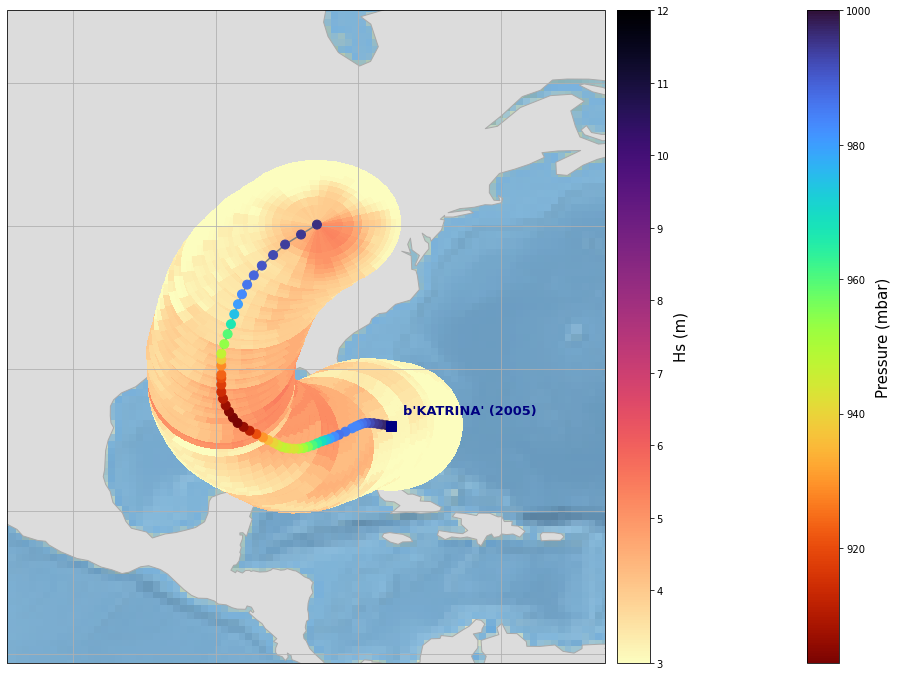

In [7]:
tc_w=Generate_Waves_TC(tc, som_fit, TCs_waves, min_number_data=20, interp=1, interp_factor=2, prct_plot=qtile, hmin=3, hmax=12)
tc_w

## Wave footprint

Here we grid the results into a regular grid with the resolution given below, to obtain the swath map of Significant Wave Height associated to a given quantile

**Obtain wave footprint associated to the 0.5 quantile**

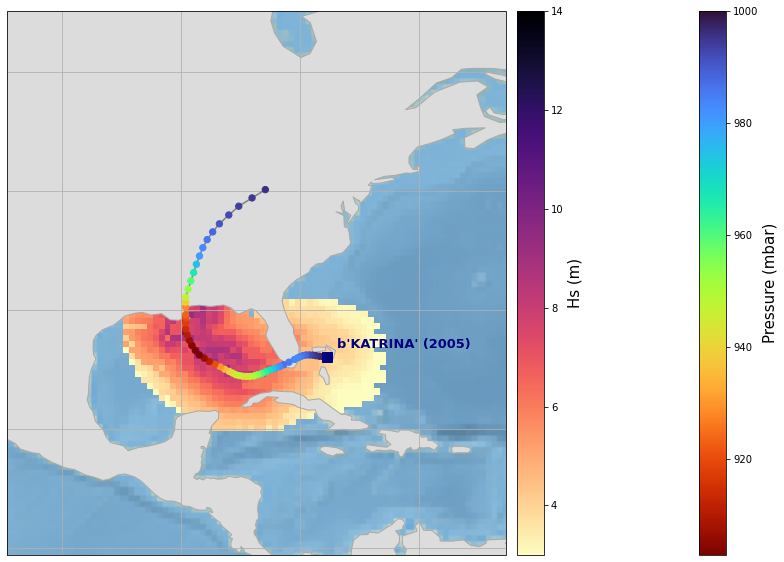

In [8]:
qtile=0.525 #Quantile to plot
discretization=0.5
tc_grid = Tc_Grid(tc_w, qtile, discretization, hmin=3, hmax=14, figsize=[24,10], plotting=1)

**Obtain wave footprint associated to the 0.9 quantile**

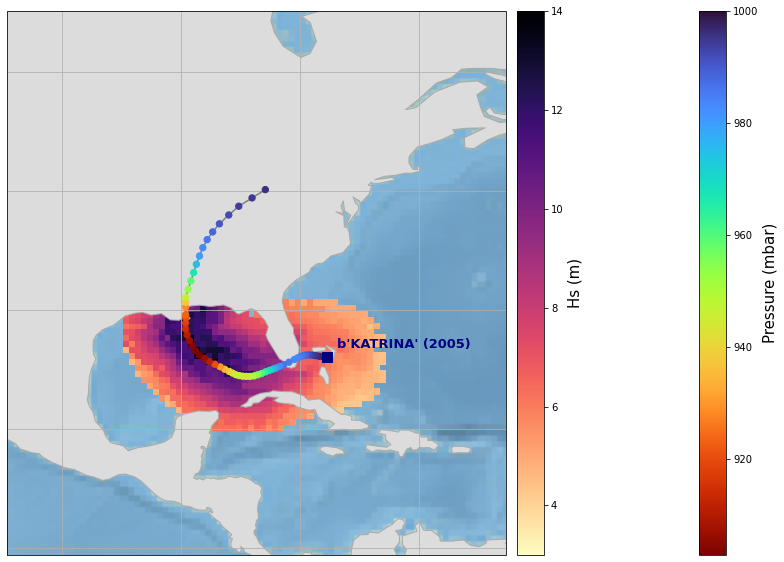

In [9]:
qtile=0.9 #Quantile to plot
discretization=0.5
tc_grid = Tc_Grid(tc_w, qtile, discretization, hmin=3, hmax=14, figsize=[24,10], plotting=1)